In [7]:
#Basic
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

#Data loader
from data_loader import index_history
from data_loader import ticker_prices

#Portfolio opt
import riskfolio as rp

#Others
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Определяем параметры
#tickers = ['AFKS', 'AFLT', 'ALRS', 'ASTR', 'BSPB', 'CBOM', 'CHMF', 'ENPG', 'FEES', 'FLOT', 'GAZP', 'GMKN', 'HEAD', 'HYDR', 'IRAO', 'LKOH', 'MAGN', 'MDMG', 'MOEX', 'MSNG', 'MTLR', 'MTSS', 'NLMK', 'NVTK', 'PHOR', 'PIKK', 'PLZL', 'POSI', 'RENI', 'ROSN', 'RTKM', 'RUAL', 'SBER', 'SBERP', 'SELG', 'SNGS', 'SNGSP', 'SVCB', 'T', 'TATN', 'TATNP', 'TRNFP', 'UGLD', 'UPRO', 'VKCO', 'VTBR', 'YDEX']
tickers = ['MCFTR', 'RGBITR']
risk_free_rate = 0.02
end_date = datetime.today()
start_date = end_date - timedelta(days=15 * 365)

In [8]:
# Загружаем исторические данные
data = index_history(tickers, start_date=start_date, end_date=end_date)
#data = ticker_prices(tickers)
data = data.set_index('TRADEDATE')

In [9]:
#data_filtered = data.drop(['YDEX', 'HEAD', 'SVCB', 'UGLD', 'ASTR'], axis=1)
data_filtered = data.copy()

In [10]:
log_returns = np.log(data_filtered / data_filtered.shift(1))
log_returns = log_returns.dropna()

In [25]:
# Building the portfolio object
port = rp.Portfolio(returns=log_returns)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0.02/252 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,MCFTR,RGBITR
weights,9.3350%,90.6650%


In [34]:
print(type(w))
print(w)

<class 'pandas.core.frame.DataFrame'>
        weights
MCFTR   9.3350%
RGBITR 90.6650%


In [48]:
rf = 0.02/252

In [56]:
log_returns.index = pd.to_datetime(log_returns.index)
print(log_returns.index)

print(log_returns.index.dtype)  # Должно быть datetime64


DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-11', '2012-03-12',
               '2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-19', '2012-03-20',
               ...
               '2025-03-20', '2025-03-21', '2025-03-24', '2025-03-25',
               '2025-03-26', '2025-03-27', '2025-03-28', '2025-03-31',
               '2025-04-01', '2025-04-02'],
              dtype='datetime64[ns]', name='TRADEDATE', length=3281, freq=None)
datetime64[ns]


<Axes: >

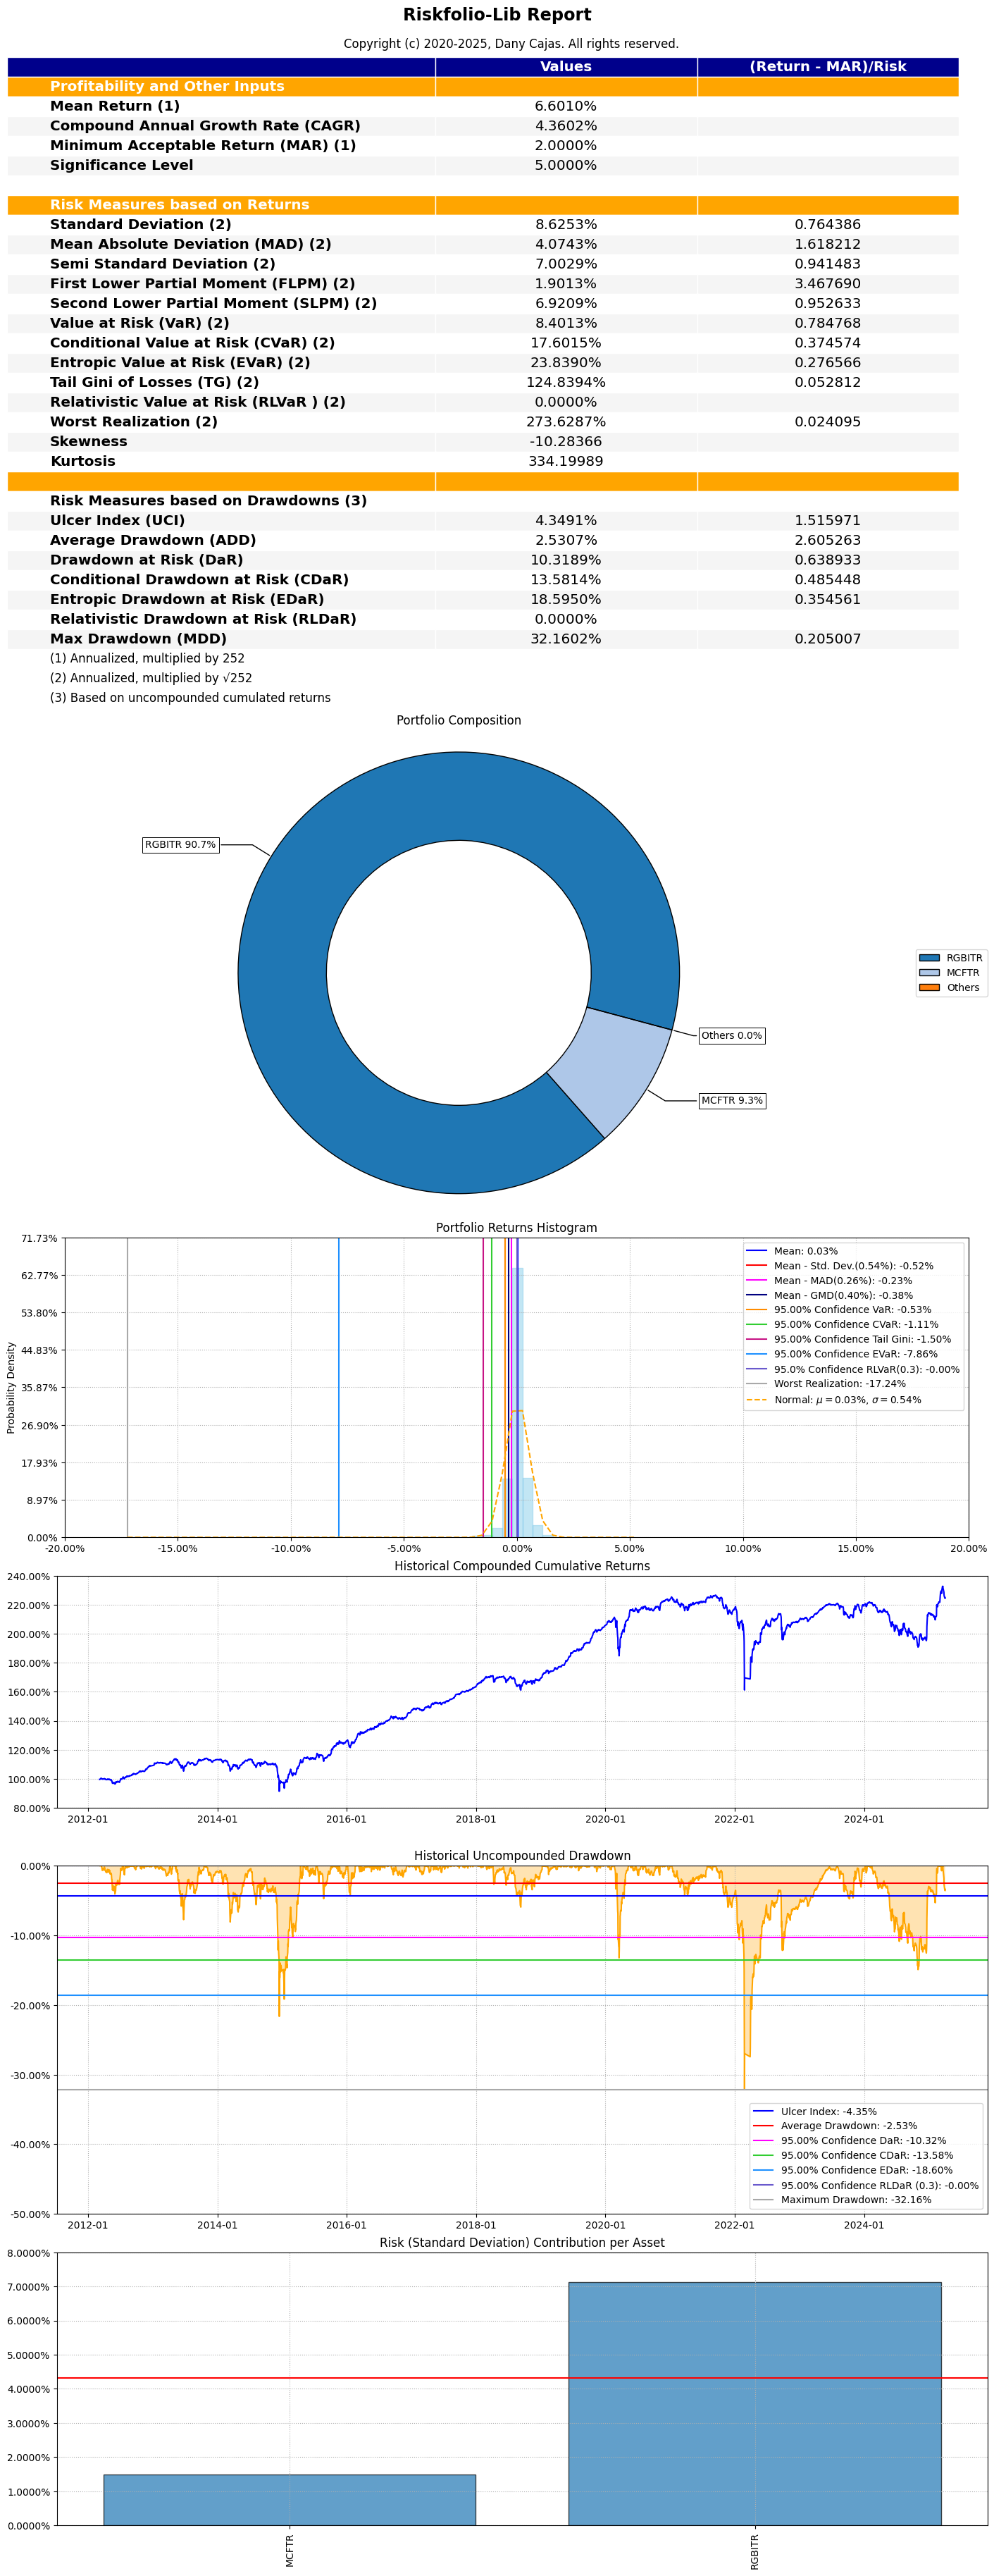

In [58]:
ax = rp.jupyter_report(log_returns,
                       w,
                       rm='MV',
                       rf=0.02/252,
                      )
ax